🔹 First 5 rows of the dataset:
   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  

🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            N

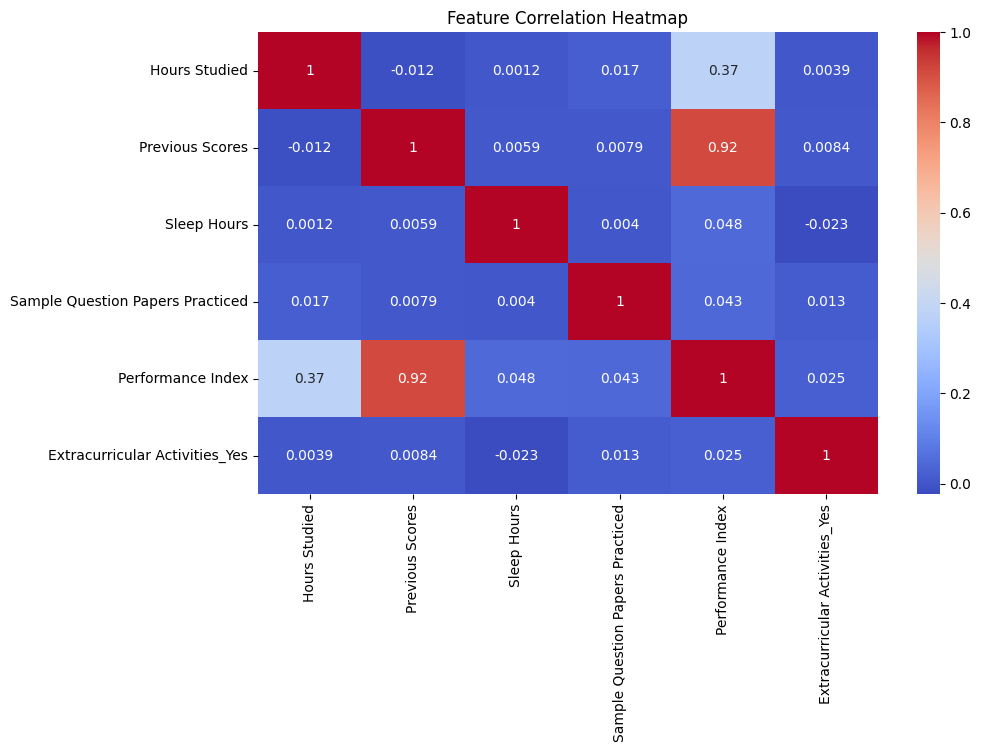

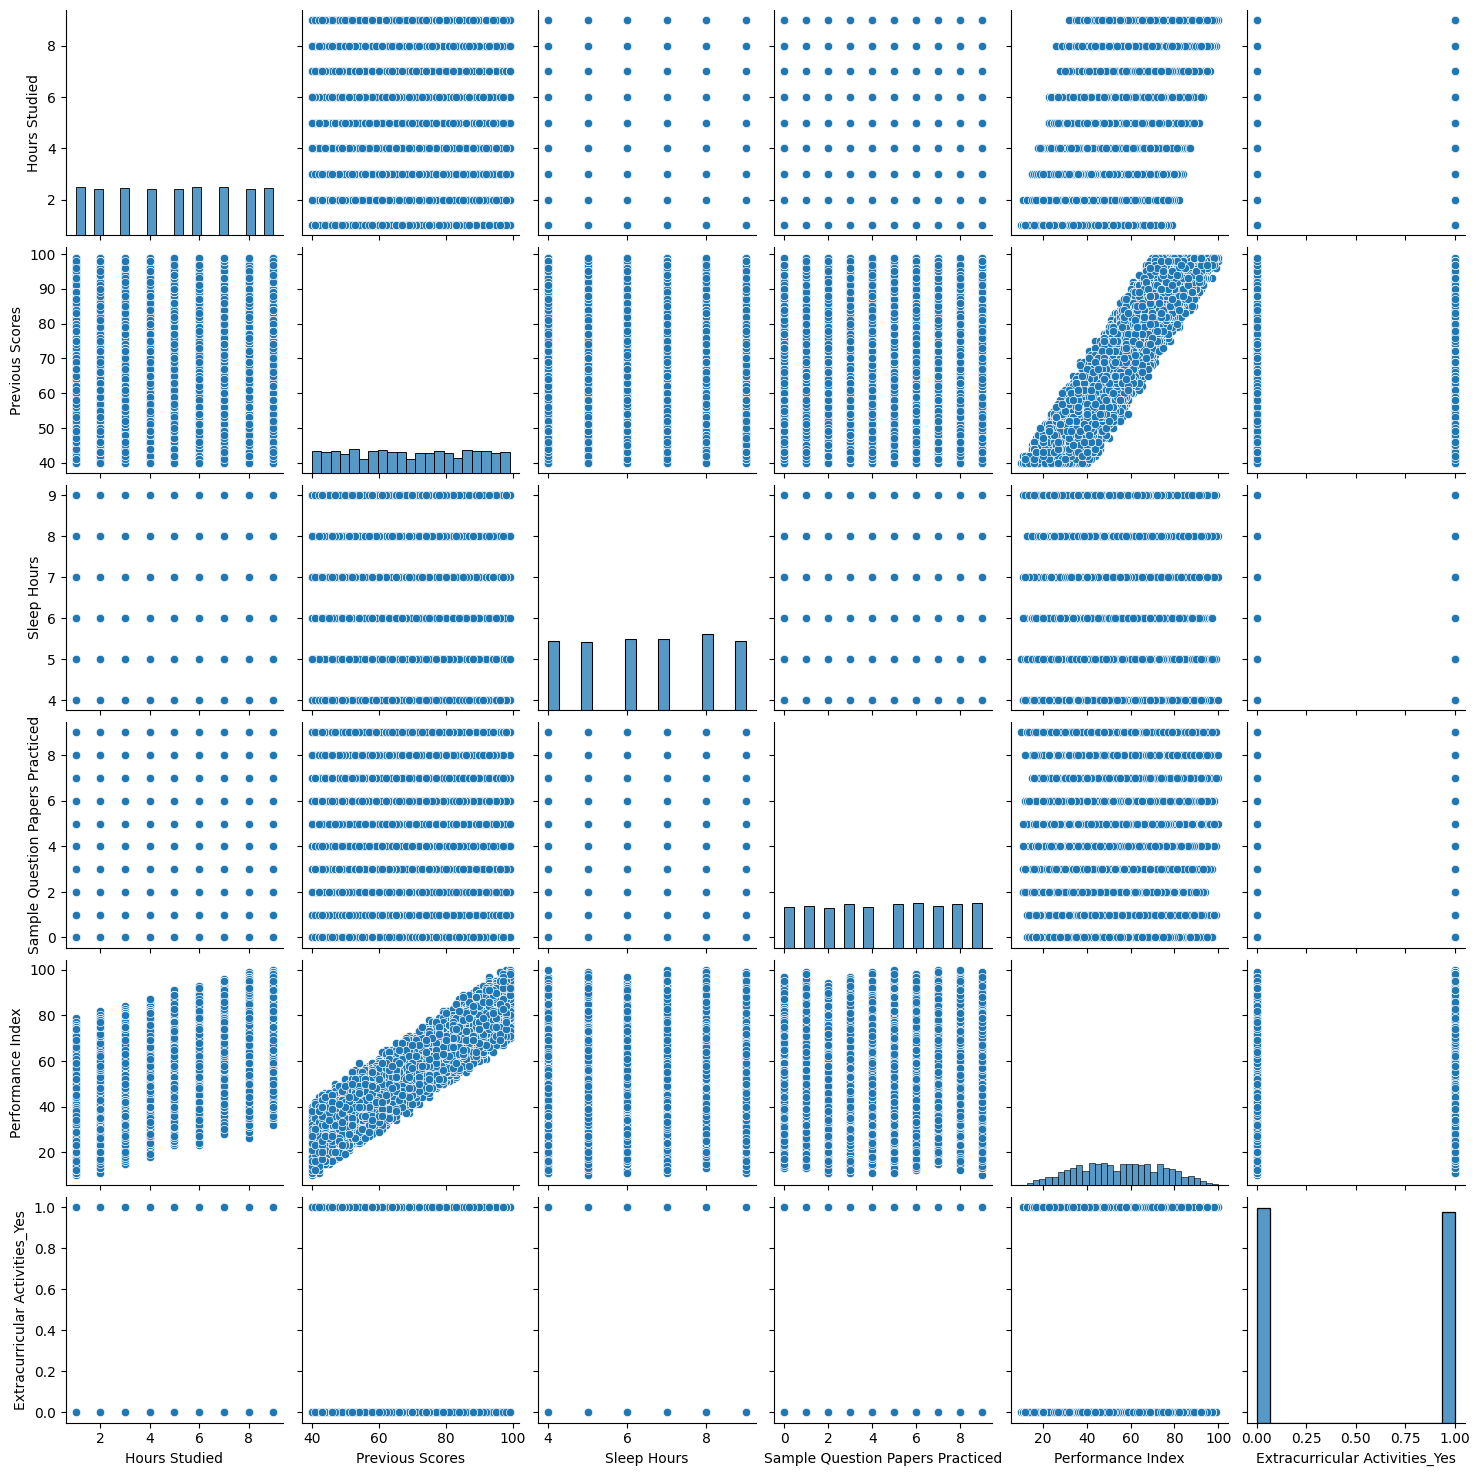


🔹 Training set size: (8000, 5)
🔹 Testing set size: (2000, 5)

✅ Model trained successfully!

📊 Model Evaluation Results:
Mean Absolute Error (MAE): 1.61
Root Mean Squared Error (RMSE): 2.02
R² Score: 0.989


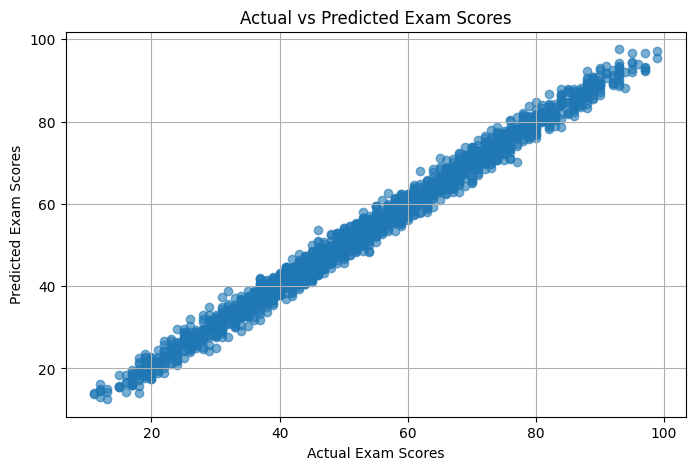

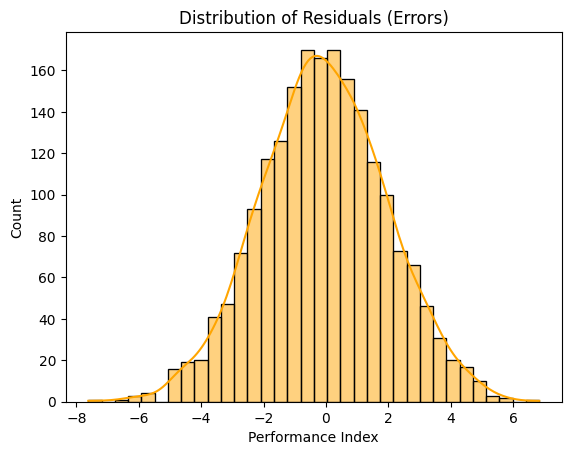


🔹 Feature Importance / Coefficients:
                                  Coefficient
Hours Studied                        2.852484
Previous Scores                      1.016988
Extracurricular Activities_Yes       0.608617
Sleep Hours                          0.476941
Sample Question Papers Practiced     0.191831

🎯 Let's predict a new student's performance!
Enter number of hours studied per day: 4
Enter previous exam scores: 90%


ValueError: could not convert string to float: '90%'

In [4]:
# ===============================================================
# 🚀 Smart Study Score Predictor – Learn the Power of Regression
# ===============================================================

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ===============================================================
# STEP 1: Load Dataset
# ===============================================================
data = pd.read_csv("/content/Student_Performance.csv")

print("🔹 First 5 rows of the dataset:")
print(data.head())
print("\n🔹 Dataset Info:")
print(data.info())

# ===============================================================
# STEP 2: Handle Missing Values
# ===============================================================
print("\n🔹 Checking for missing values:")
print(data.isnull().sum())

data.fillna(data.mean(numeric_only=True), inplace=True)

# ===============================================================
# STEP 3: Encode Categorical Data
# ===============================================================
data = pd.get_dummies(data, drop_first=True)

print("\n🔹 Columns after encoding:")
print(data.columns)

# ===============================================================
# STEP 4: Data Visualization
# ===============================================================
print("\n🔹 Generating visual insights...")

plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

sns.pairplot(data)
plt.show()

# ===============================================================
# STEP 5: Define Features (X) and Target (y)
# ===============================================================
X = data.drop("Performance Index", axis=1)
y = data["Performance Index"]

# ===============================================================
# STEP 6: Train-Test Split
# ===============================================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\n🔹 Training set size:", X_train.shape)
print("🔹 Testing set size:", X_test.shape)

# ===============================================================
# STEP 7: Train the Regression Model
# ===============================================================
model = LinearRegression()
model.fit(X_train, y_train)
print("\n✅ Model trained successfully!")

# ===============================================================
# STEP 8: Make Predictions
# ===============================================================
y_pred = model.predict(X_test)

# ===============================================================
# STEP 9: Evaluate Model Performance
# ===============================================================
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n📊 Model Evaluation Results:")
print("Mean Absolute Error (MAE):", round(mae, 2))
print("Root Mean Squared Error (RMSE):", round(rmse, 2))
print("R² Score:", round(r2, 3))

# ===============================================================
# STEP 10: Visualize Predictions
# ===============================================================
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.title("Actual vs Predicted Exam Scores")
plt.grid(True)
plt.show()

residuals = y_test - y_pred
sns.histplot(residuals, kde=True, color='orange')
plt.title("Distribution of Residuals (Errors)")
plt.show()

# ===============================================================
# STEP 11: Feature Importance
# ===============================================================
coefficients = pd.DataFrame(model.coef_, X.columns, columns=["Coefficient"])
print("\n🔹 Feature Importance / Coefficients:")
print(coefficients.sort_values(by="Coefficient", ascending=False))

# ===============================================================
# STEP 12: Take User Input for New Prediction
# ===============================================================
print("\n🎯 Let's predict a new student's performance!")

# Collect input values
hours_studied = float(input("Enter number of hours studied per day: "))
previous_scores = float(input("Enter previous exam scores: "))
sleep_hours = float(input("Enter average sleep hours per day: "))
sample_papers = float(input("Enter number of sample papers practiced: "))
extra = input("Does the student participate in extracurricular activities? (Yes/No): ")

# Convert input into DataFrame format
user_data = {
    'Hours Studied': [hours_studied],
    'Previous Scores': [previous_scores],
    'Sleep Hours': [sleep_hours],
    'Sample Question Papers Practiced': [sample_papers],
    'Extracurricular Activities_Yes': [1 if extra.lower() == 'yes' else 0]
}

user_df = pd.DataFrame(user_data)

# Predict performance
predicted_score = model.predict(user_df)
print(f"\n📘 Predicted Performance Index: {predicted_score[0]:.2f}")
